In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
churn_data = pd.read_csv("customer_churn1.csv",skipinitialspace=True)

In [5]:
churn_data.shape

(7043, 21)

In [6]:
churn_data.size

147903

In [7]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## we will change total charges to float data type from object as it contains float value

In [10]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'],errors = 'coerce')

In [11]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
churn_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## AS null vallues are there in total charges, we will drop the null data  as the complete dataset is relatively large and wont impact the data insights and won't lead to a severe loss of data

In [13]:
churn_data.dropna(inplace = True)

In [14]:
churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## a customerid is no where helping in prediction ; also its values are inappropriate to fit the model so we will drop it

In [15]:
churn_data.drop(columns = ['customerID'],inplace = True)

In [16]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [17]:
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## NOW WE WILL USE LABEL ENCODING TO CONVERT CATEGORICAL COLUMNS TO NUMERICAL IN (0,1) FORM  AS THESE KINDS OF STRING ARE NOT A GOOD FIT FOR THE MODEL.  THESE ARE INCOMPATIBLE TO THE CLASSIFICATION MODEL.

## THIS CAN BE DONE BY USING THE LABEL_ENCODER() OR MAP() FUNCTION

In [18]:
churn_data['Partner'] = churn_data['Partner'].map({'Yes':1,"No":0})
churn_data['Dependents'] = churn_data['Dependents'].map({'Yes':1,'No':0})
churn_data['MultipleLines'] = churn_data['MultipleLines'].map({'No phone service':0,'No':1,'Yes':2})
churn_data['InternetService'] = churn_data['InternetService'].map({'DSL':0,'Fiber optic':1,'No':2})
churn_data['OnlineSecurity'] = churn_data['OnlineSecurity'].map({'Yes':1,'No':0,'No internet service':2})
churn_data['OnlineBackup'] = churn_data['OnlineBackup'].map({'Yes':1,'No':0,'No internet service':2})
churn_data['DeviceProtection'] = churn_data['DeviceProtection'].map({'Yes':1,'No':0,'No internet service':2})
churn_data['TechSupport'] = churn_data['TechSupport'].map({'Yes':1,'No':0,'No internet service':2})
churn_data['StreamingTV'] = churn_data['StreamingTV'].map({'Yes':1,'No':0,'No internet service':2})
churn_data['StreamingMovies'] = churn_data['StreamingMovies'].map({'Yes':1,'No':0,'No internet service':2})
churn_data['Contract'] = churn_data['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
churn_data['PaperlessBilling'] = churn_data['PaperlessBilling'].map({'Yes':1,"No":0})
churn_data['PaymentMethod'] = churn_data['PaymentMethod'].map({'Electronic check':1,
                                                               "Mailed check":0,"Bank transfer (automatic)":2,
                                                               "Credit card (automatic)":3})
churn_data['gender'] = churn_data['gender'].map({'Female':1,'Male':0})
churn_data['PhoneService'] = churn_data['PhoneService'].map({'Yes':1,'No':0})
                        

In [19]:
churn_data['PaymentMethod'].value_counts()

1    2365
0    1604
2    1542
3    1521
Name: PaymentMethod, dtype: int64

In [20]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85,No
1,0,0,0,0,34,1,1,0,1,0,1,0,0,0,1,0,0,56.95,1889.50,No
2,0,0,0,0,2,1,1,0,1,1,0,0,0,0,0,1,0,53.85,108.15,Yes
3,0,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,No
4,1,0,0,0,2,1,1,1,0,0,0,0,0,0,0,1,1,70.70,151.65,Yes


## Data Visualization

## how many customers are churned out and how many are still in contract with the organization

<Axes: >

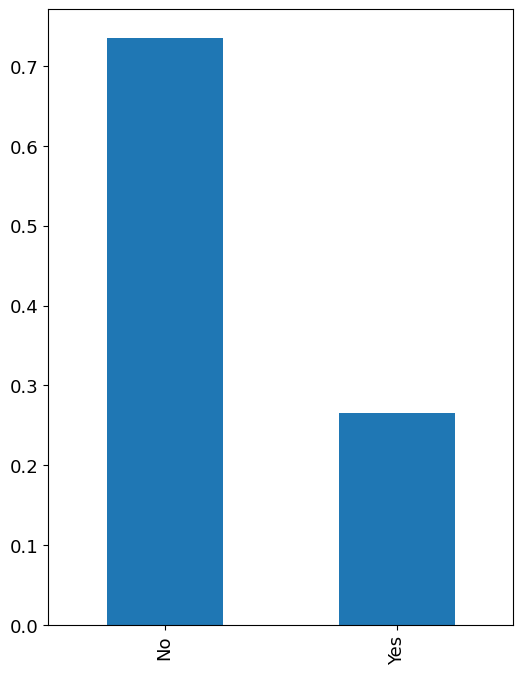

In [21]:
churn_data['Churn'].value_counts(normalize = True).plot(kind = 'bar',figsize =(6,8),fontsize = 13)

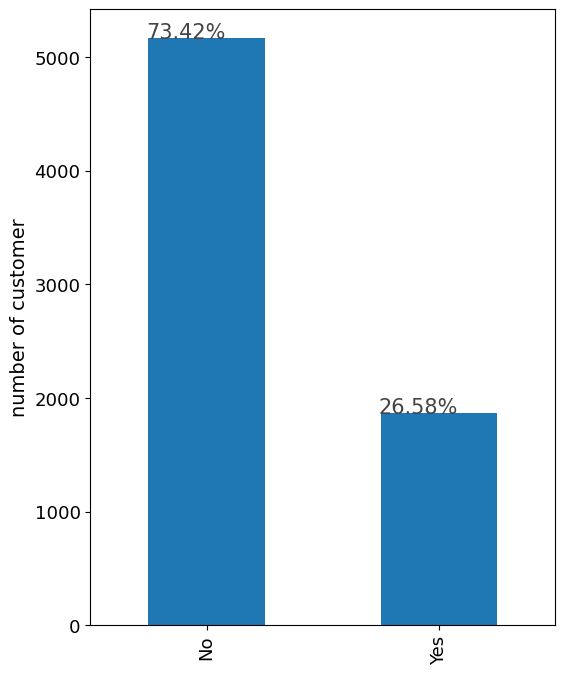

In [22]:
ax = churn_data['Churn'].value_counts().plot(kind='bar',figsize =(6,8),fontsize = 13)
ax.set_ylabel("number of customer",fontsize = 14)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
    
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()-.01,i.get_height()+0.5,\
           str(round((i.get_height()/total)*100,2))+'%',fontsize = 15,color = '#444444')
    
plt.show()

## from the above bar plot we have noticed that 26.58% of people have churned out and 73.43% people have not churned.



# Bivariate Analysis

## inference from first scatter plot : more the total charge,higher the tenure ,lessser the churning rate because as more people have churned out who have less total charge and less tenure.

## inference from second scatter plot: more the monthly charge,higher the tenure , lesser the churning rate

<Axes: xlabel='MonthlyCharges', ylabel='tenure'>

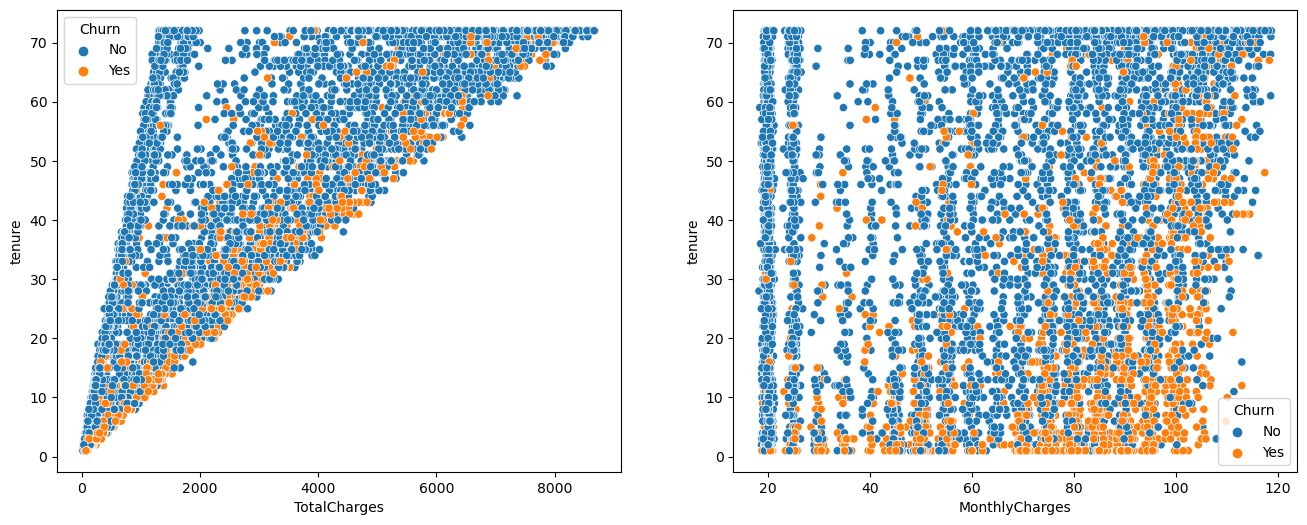

In [23]:
_, ax= plt.subplots(1,2,figsize = (16,6))
sns.scatterplot(x = "TotalCharges",y = 'tenure',hue = 'Churn',data = churn_data,ax = ax[0])
sns.scatterplot(x = "MonthlyCharges",y = "tenure",hue = "Churn",data = churn_data,ax = ax[1])

C:\Users\gandh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\gandh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\gandh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\gandh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  

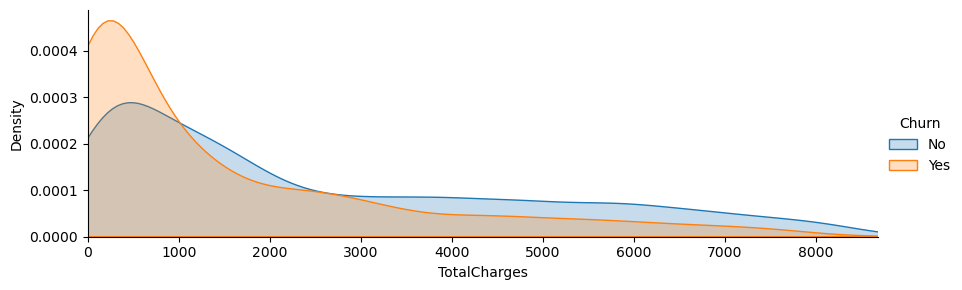

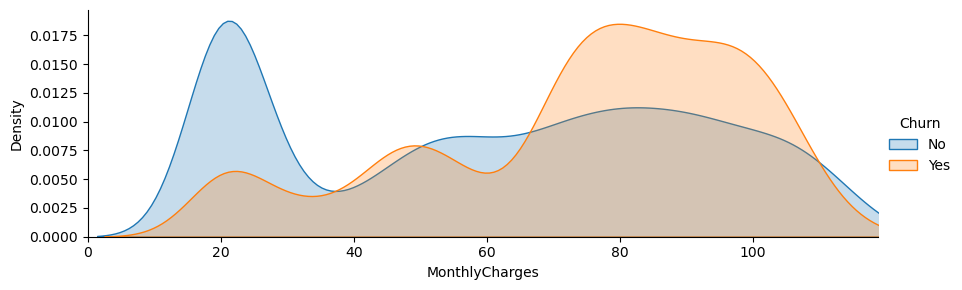

In [24]:
facet = sns.FacetGrid(churn_data,hue = "Churn",aspect = 3)
facet.map(sns.kdeplot,"TotalCharges",shade = True)
facet.set(xlim =(0,churn_data["TotalCharges"].max()))
facet.add_legend()

facet = sns.FacetGrid(churn_data,hue = "Churn",aspect = 3)
facet.map(sns.kdeplot,"MonthlyCharges",shade = True)
facet.set(xlim =(0,churn_data["MonthlyCharges"].max()))
facet.add_legend()

C:\Users\gandh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\gandh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


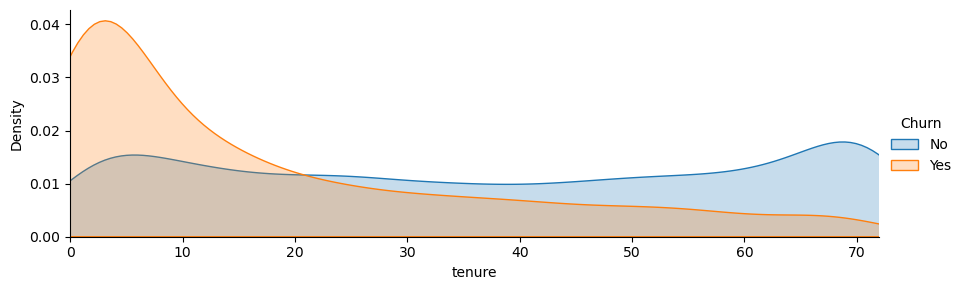

In [25]:
facet = sns.FacetGrid(churn_data,hue = "Churn",aspect = 3)
facet.map(sns.kdeplot,"tenure",shade = True)
facet.set(xlim =(0,churn_data["tenure"].max()))
facet.add_legend()

# Correlation

C:\Users\gandh\AppData\Local\Temp\ipykernel_9068\1795000718.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn_data.corr(),annot = True,fmt = ".1f")


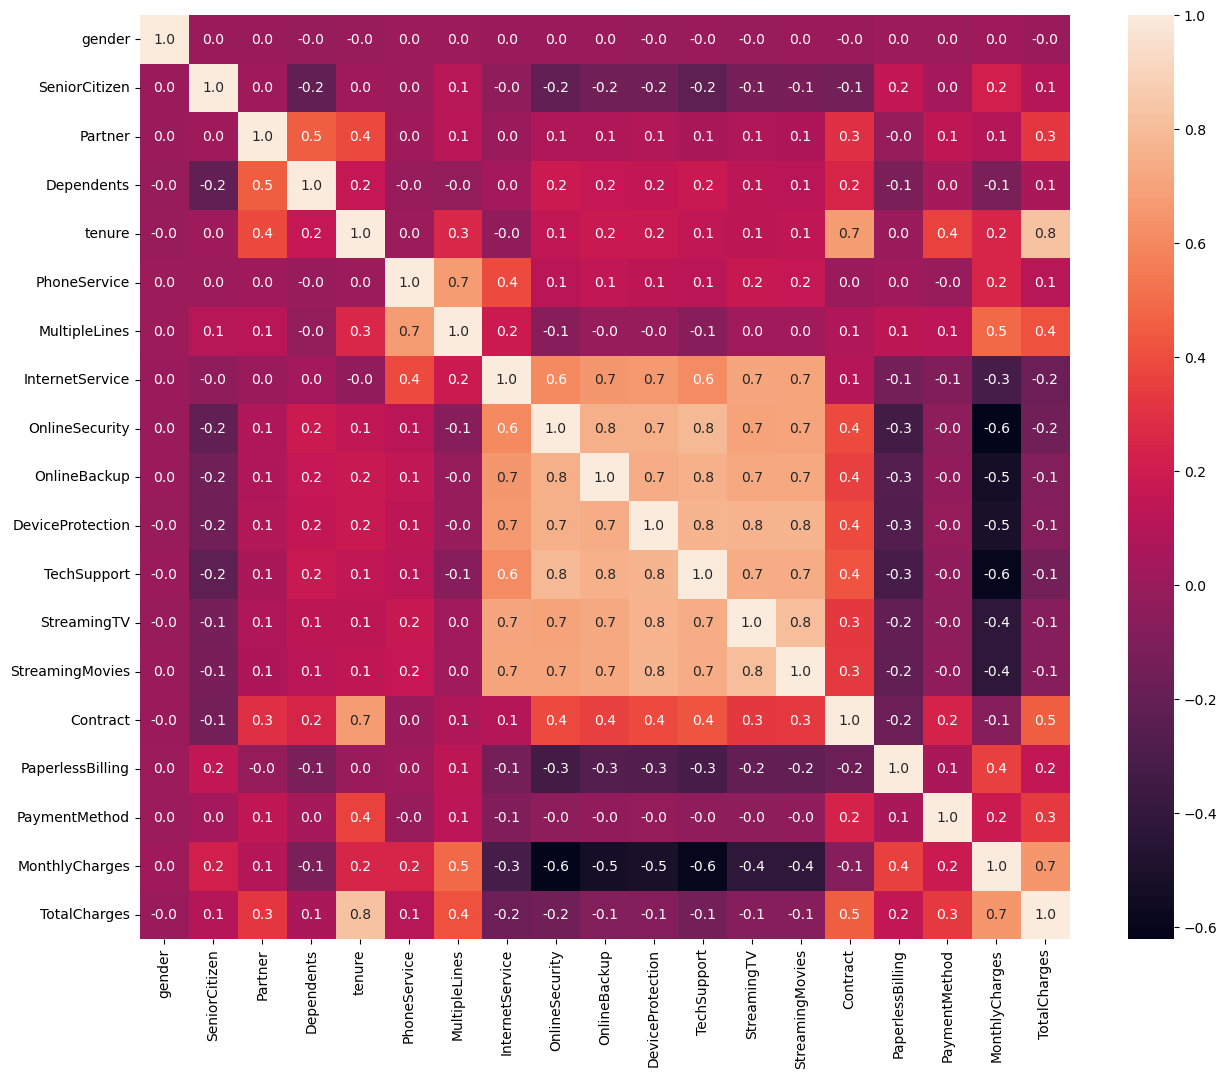

In [26]:
plt.figure(figsize = (15,12))
sns.heatmap(churn_data.corr(),annot = True,fmt = ".1f")
plt.show()

## correlation gives us the linear dependency of one variable with respect to other. here most of the variables including the target variable are categorical, so heatmap here gives an intution of the direction of the  relationship but it does not give an accurate value.we can use it to get a basic idea but it is not the true assessment of the relationship between two variables

## ideally we must visualise each categorical variable to interpret the relationship 

## high correlation features : 0.7,0.8

# Model Building

## first we will map the churn column with 1 and 0  instead of yes and no so all features and labels will have uniform datatype








In [27]:
churn_data["Churn"] = churn_data["Churn"].map({'Yes':1,"No":0})

## now dividing the indepenednt and dependent variables

In [28]:
x = churn_data.iloc[:,:-1].values
y = churn_data.iloc[:,-1].values

## splitting data into training model and testing data for prediction

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [30]:
x_train.shape[0]+x_test.shape[0]

7032

## fitting data into randomforest classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

In [32]:
rf1 = rf.fit(x_train,y_train)

In [33]:
## checking for prediction for above fit model

y_pred = rf1.predict(x_test)

In [34]:
# from predicted values and test values(actual values), we will check model efficiency.

accuracy_score(rf1.predict(x_train),y_train)

0.9978666666666667

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.7953091684434968

## this random forest is a combination of multiple decision trees all of which are overfitted

## so we need to do some hyperparameter tuning



# HYPER PARAMETER TUNING

In [44]:
## we will select best values for each parameter

from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200,stop = 2000,num =10)]

# number of features to be considered at every split
max_features = ['auto','sqrt']

# maximum numbr of levels in a tree
max_depth = [int(x) for x in np.linspace(10,110,11)]
max_depth.append(None)

# minimum number of samples reqd to split a node
min_samples_split = [2,5,10]

# minimum number of samples reqd at each leaf node
min_samples_leaf =[1,2,4]

#method of selecting samples for training each tree
## bootstrap - sampling with replacement ; each and everytime a new tree will be built sampling will happen with replacement

bootstrap = [True,False]

# create the random grid

random_grid = {'n_estimators':n_estimators,
              "max_features": max_features,
              "max_depth": max_depth,
              "min_samples_split": min_samples_split,
              "min_samples_leaf": min_samples_leaf,
              "bootstrap":bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


steps to implement:
    
    1. use random grid to search for best hyperparameters
    2. create the base model to tune
    3. Random search of parameters, using 3 fold cross validation
    4.search across 100 different combinations, and use all available cores
    5.Fit the random search model

In [46]:
rf = RandomForestClassifier(random_state = 42)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions =random_grid, 
                               n_iter = 100, scoring = "neg_mean_absolute_error",
                               cv = 3,verbose = 2, random_state = 42,n_jobs = -1,
                               return_train_score = True)

rf2 = rf_random.fit(x_train,y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [47]:
## from above fitted model : we cam check the best values for each parameter accross 100 folds

rf2.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [48]:
# so after hyper parameter tuning , we have fitted the model with best parameter and best value

# lets check the predictions for the model fitted after tuning

y_pred = rf2.predict(x_test)


In [49]:
# so from below output we can see there is 1.28%  change in accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)


0.8002842928216063

In [50]:

from sklearn.metrics import accuracy_score
accuracy_score(rf2.predict(x_train),y_train)


0.88

# model evaluation

we will check the feature importance of the fitted model where 
feature importance helps the contribution of each and every features for the model


In [54]:
importance = rf1.feature_importances_

In [56]:
importance = pd.Series(importance)
importance

0     0.027349
1     0.022007
2     0.021403
3     0.019106
4     0.163606
5     0.004770
6     0.023971
7     0.026527
8     0.041565
9     0.027096
10    0.023176
11    0.043198
12    0.019687
13    0.021260
14    0.076573
15    0.025278
16    0.052392
17    0.172917
18    0.188116
dtype: float64

In [57]:
df = pd.DataFrame(columns = ['Feature','importance'])

In [58]:
cols = list(churn_data.drop('Churn',axis = 1).columns)
df['Feature'] = cols
df['importance'] = importance


In [59]:
df

,Feature,importance
0,gender,0.027349
1,SeniorCitizen,0.022007
2,Partner,0.021403
3,Dependents,0.019106
4,tenure,0.163606
5,PhoneService,0.004770
6,MultipleLines,0.023971
7,InternetService,0.026527
8,OnlineSecurity,0.041565
9,OnlineBackup,0.027096


In [61]:
df.sort_values(by = 'importance',ascending = False)

,Feature,importance
18,TotalCharges,0.188116
17,MonthlyCharges,0.172917
4,tenure,0.163606
14,Contract,0.076573
16,PaymentMethod,0.052392
11,TechSupport,0.043198
8,OnlineSecurity,0.041565
0,gender,0.027349
9,OnlineBackup,0.027096
7,InternetService,0.026527


<Axes: xlabel='Feature', ylabel='importance'>

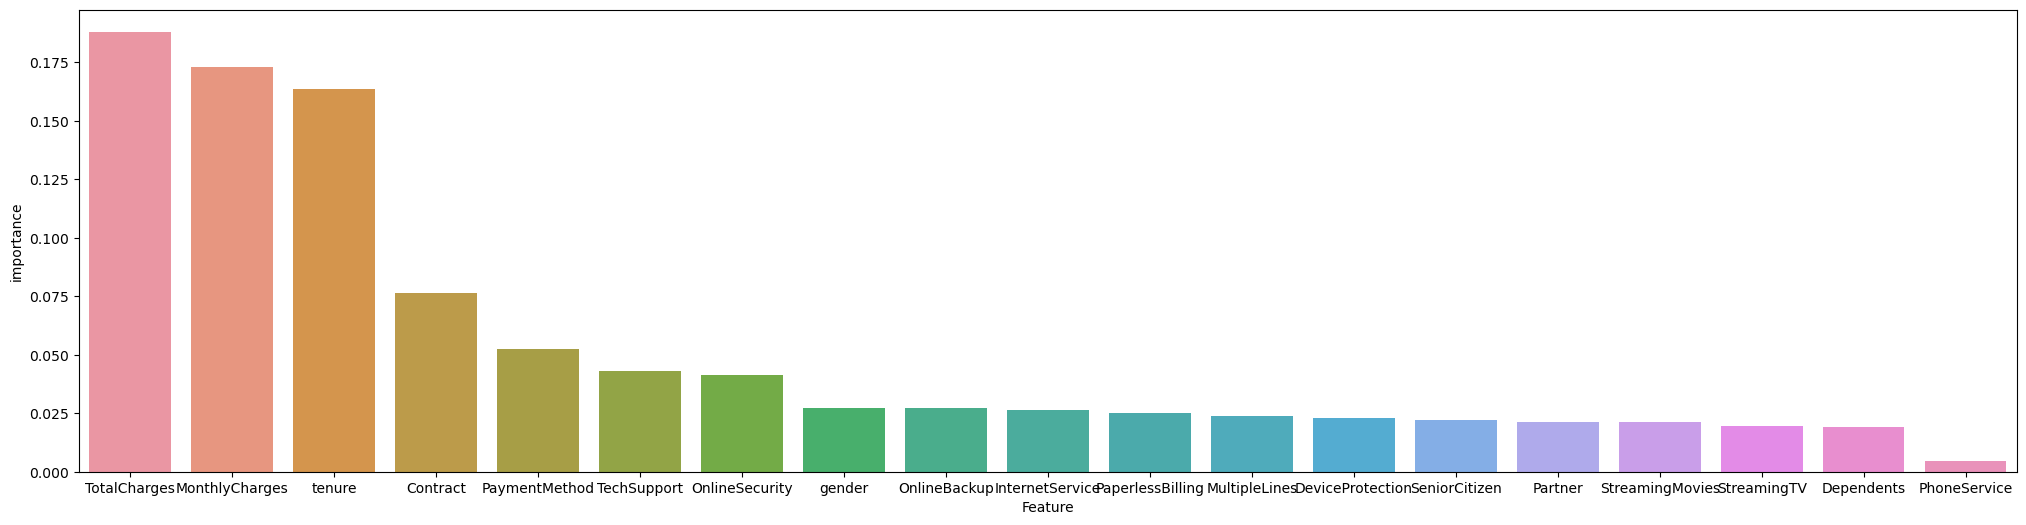

In [62]:
plt.figure(figsize=(25,6))
sns.barplot(x = 'Feature',y = "importance",data = df,order = df.sort_values("importance",ascending = False).Feature)

classification_report helps us to evaluate the model

There are four ways to check the predictions True Negative: the case was negative and predicted negative True Positive: the case was positive and predicted positive False Negative: the case was positive but predicted negative False Positive: the case was negative but predicted positive

Precision:- Accuracy of positive predictions. Precision = TP/(TP + FP)

Recall:- Fraction of positives that were correctly identified. Recall = TP/(TP+FN)

F1 score:- What percent of positive predictions were correct F1 score = 2*(Recall * Precision) / (Recall + Precision)

Support:-Support is the number of actual occurrences of the class in the specified dataset

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.66      0.50      0.57       369

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [67]:
rf2 = RandomForestClassifier(n_estimators= 2000,
 min_samples_split =  10,
 min_samples_leaf=1,
 max_features='sqrt',
 max_depth=10,
 bootstrap= False)

rf2= rf2.fit(x_train, y_train)

In [70]:
feature = rf2.feature_importances_

In [71]:
pd.Series(feature)

0     0.008599
1     0.014660
2     0.008295
3     0.010615
4     0.163853
5     0.003853
6     0.016823
7     0.049287
8     0.081749
9     0.028748
10    0.021436
11    0.068584
12    0.016435
13    0.019308
14    0.168315
15    0.019815
16    0.039408
17    0.115519
18    0.144700
dtype: float64